In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns



In [ ]:

data = pd.read_csv('BankNote_Authentication.csv')
features = data.drop('class', axis=1)
target = data['class']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_no_reg = LogisticRegression(C=1e10, random_state=42)
model_no_reg.fit(X_train_scaled, y_train)
train_acc_no_reg = model_no_reg.score(X_train_scaled, y_train)
test_acc_no_reg = model_no_reg.score(X_test_scaled, y_test)

model_l2 = LogisticRegression(C=1, random_state=42)
model_l2.fit(X_train_scaled, y_train)
train_acc_l2 = model_l2.score(X_train_scaled, y_train)
test_acc_l2 = model_l2.score(X_test_scaled, y_test)

print("Model Accuracy Comparison:")
print(f"Without Regularization - Train: {train_acc_no_reg:.4f}, Test: {test_acc_no_reg:.4f}")
print(f"With L2 Regularization - Train: {train_acc_l2:.4f}, Test: {test_acc_l2:.4f}")


Model Accuracy Comparison:
Without Regularization - Train: 0.9927, Test: 0.9855
With L2 Regularization - Train: 0.9818, Test: 0.9782


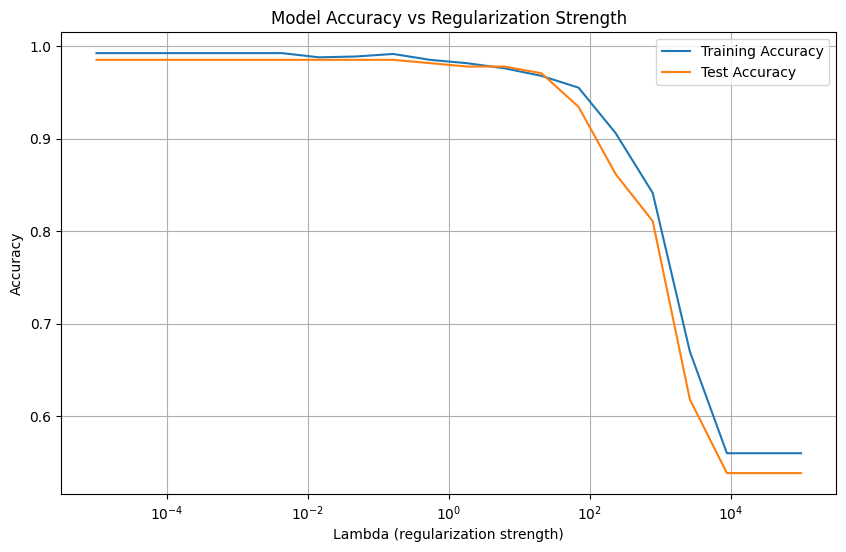

In [ ]:
lambda_values = np.logspace(-5, 5, 20)
train_accuracies = []
test_accuracies = []

for lambda_val in lambda_values:
    model = LogisticRegression(C=1/lambda_val, random_state=42)
    model.fit(X_train_scaled, y_train)
    train_accuracies.append(model.score(X_train_scaled, y_train))
    test_accuracies.append(model.score(X_test_scaled, y_test))

plt.figure(figsize=(10, 6))
plt.semilogx(lambda_values, train_accuracies, label='Training Accuracy')
plt.semilogx(lambda_values, test_accuracies, label='Test Accuracy')
plt.xlabel('Lambda (Regularization Strength)')
plt.ylabel('Accuracy')
plt.title('Model Accuracy vs Regularization Strength')
plt.legend()
plt.grid(True)
plt.show()


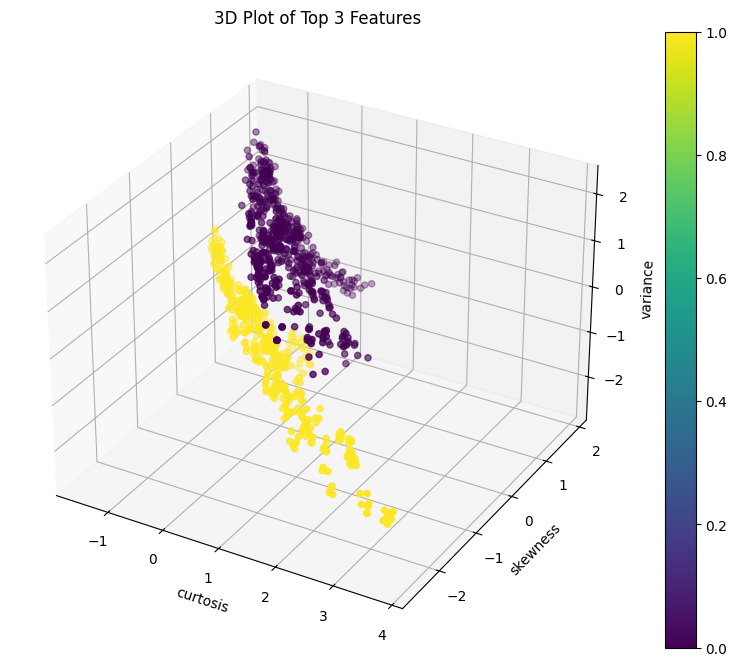

In [ ]:
feature_importance = np.abs(model_l2.coef_[0])
top_features = np.argsort(feature_importance)[-3:]
feature_names = features.columns[top_features]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_train_scaled[:, top_features[0]],
                     X_train_scaled[:, top_features[1]],
                     X_train_scaled[:, top_features[2]],
                     c=y_train, cmap='viridis')
ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])
ax.set_zlabel(feature_names[2])
plt.colorbar(scatter)
plt.title('3D Plot of Top 3 Features')
plt.show()



In [ ]:
# 5. Create outliers
X_outliers = X_train_scaled.copy()
n_outliers = 20
random_indices = np.random.choice(len(X_outliers), n_outliers, replace=False)
X_outliers[random_indices] = X_outliers[random_indices] * 5 


In [9]:
# 6. Fit model with outliers
log_reg_outliers = LogisticRegression(C=1, random_state=42)
log_reg_outliers.fit(X_outliers, y_train)
outliers_train_acc = log_reg_outliers.score(X_outliers, y_train)
outliers_test_acc = log_reg_outliers.score(X_test_scaled, y_test)

print("\nModel Performance with Outliers:")
print(f"Training Accuracy: {outliers_train_acc:.4f}")
print(f"Testing Accuracy: {outliers_test_acc:.4f}")


Model Performance with Outliers:
Training Accuracy: 0.9818
Testing Accuracy: 0.9782


In [ ]:
# Feature Importance using Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
dt_importance = dt.feature_importances_
dt_top_3 = np.argsort(dt_importance)[-3:]

print("\nFeature Importance Comparison:")
print("\nDecision Tree Top 3 Features:")
for idx, importance in zip(dt_top_3, dt_importance[dt_top_3]):
    print(f"{features.columns[idx]}: {importance:.4f}")

print("\nLogistic Regression Top 3 Features:")
for idx, importance in zip(top_features, feature_importance[top_features]):
    print(f"{features.columns[idx]}: {importance:.4f}")


Feature Importance Comparison:

Decision Tree Top 3 Features:
curtosis: 0.1415
skewness: 0.2229
variance: 0.6223

Logistic Regression Top 3 Features:
curtosis: 4.2804
skewness: 4.6680
variance: 4.7730
